### Part 1. Data Loading & Visualizations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

path_train = os.path.join("csvs","train.csv")
path_test = os.path.join("csvs","test.csv")

In [15]:
data = np.loadtxt(path_train,skiprows=1, delimiter=",")
print(f"- The dataset shape is equal to {data.shape}")
X,y = data[:,1:]/255, data[:,0].astype("int64")

- The dataset shape is equal to (42000, 785)


In [13]:
# Checking the unique digits
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
indices = []
for digit in np.unique(y):
    indices.append(np.where(y == digit)[0])

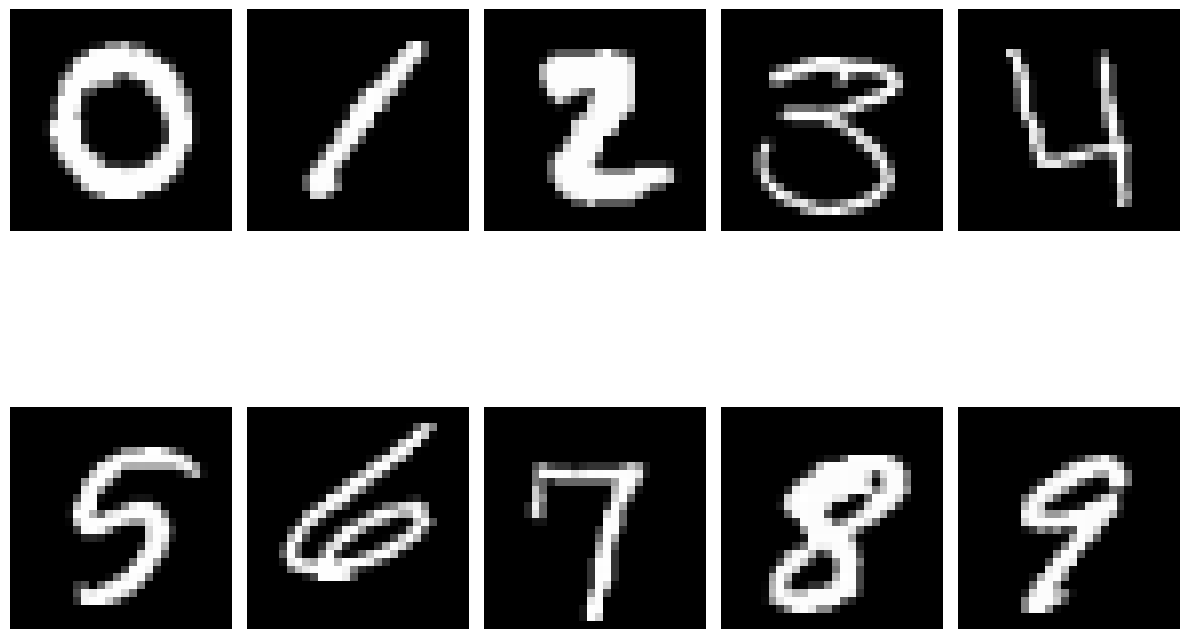

In [63]:
# Visualizing some samples
fig, ax = plt.subplots(figsize = (12,10), nrows = 2, ncols =5)
for i,idx in enumerate(indices):
    r,c = divmod(i,5)
    img = X[idx,:]
    img.resize((28,28))
    ax[r,c].imshow(img, cmap = "gray")
    ax[r,c].axis("off")
plt.tight_layout()
plt.show()

### Part 2. Deep Learning models

Preparing the training, validation and test sets

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,y, test_size = 0.3, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_val, y_val, test_size = 0.5, random_state=42
)

In [67]:
print(f"Training size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

Training size: 29400, Validation size: 6300, Test size: 6300


#### 2.1. A Simple MLP

In [71]:
from models import mlp_dataset, MLP
from training import training_loop, test_loop

In [72]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 64
LR = 1e-4
PATIENCE = 10
loss_fn = nn.CrossEntropyLoss().to(device)
EPOCHS = 300

In [73]:
model = MLP().to(device)

In [74]:
model

MLP(
  (linear_relu_stack): Sequential(
    (Linear 1): Linear(in_features=784, out_features=512, bias=False)
    (BatchNorm1D 1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Relu 1): ReLU()
    (Dropout 1): Dropout(p=0.2, inplace=False)
    (Linear 2): Linear(in_features=512, out_features=256, bias=False)
    (BatchNorm1D 2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Relu 2): ReLU()
    (Dropout 2): Dropout(p=0.2, inplace=False)
    (Out Linear): Linear(in_features=128, out_features=10, bias=True)
  )
)